In [10]:
import numpy as np 
import pandas as pd

In [11]:
df = pd.read_csv("abcoffee_scrape_data2.csv")
df.head()

,Name,Review,Order Type,Rating,Date,Sentiment
0,Palash Verma,Told them not to send light coffee but it is n...,DELIVERY,-,yesterday,Neutral
1,Aditi Solanki,NaN,DELIVERY,4.3,2 days ago,Unknown
2,AMU SATVILKAR,It was bitter,DELIVERY,1,3 days ago,Neutral
3,Aditi Solanki,I am in love with the coffee…. Cold Coffee was...,DELIVERY,5,3 days ago,Positive
4,Rishita Kumavat,It really made my day.... thank you ... 🤍💫\nsp...,DELIVERY,1,9 days ago,Positive


In [14]:
# Count the occurrences of each sentiment
sentiment_counts = df['Sentiment'].value_counts()

# Print the results
for sentiment, count in sentiment_counts.items():
    print(f"Number of reviews with sentiment {sentiment}: {count}")


Number of reviews with sentiment Unknown: 47
Number of reviews with sentiment Neutral: 39
Number of reviews with sentiment Positive: 19
Number of reviews with sentiment Negative: 12


In [17]:
import numpy as np

# Define a mapping for sentiment values
sentiment_mapping = {'Neutral': 3, 'Positive': 4, 'Negative': 1}

# Replace '-' in 'Rating' column based on sentiment values
df['Rating'] = df.apply(lambda row: sentiment_mapping.get(row['Sentiment'], np.nan) if row['Rating'] == '-' else row['Rating'], axis=1)

# Convert the 'Rating' column to numeric
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

df.head()


,Name,Review,Order Type,Rating,Date,Sentiment
0,Palash Verma,Told them not to send light coffee but it is n...,DELIVERY,3.0,yesterday,Neutral
1,Aditi Solanki,NaN,DELIVERY,4.3,2 days ago,Unknown
2,AMU SATVILKAR,It was bitter,DELIVERY,1.0,3 days ago,Neutral
3,Aditi Solanki,I am in love with the coffee…. Cold Coffee was...,DELIVERY,5.0,3 days ago,Positive
4,Rishita Kumavat,It really made my day.... thank you ... 🤍💫\nsp...,DELIVERY,1.0,9 days ago,Positive


In [18]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

Average Rating: 4.49


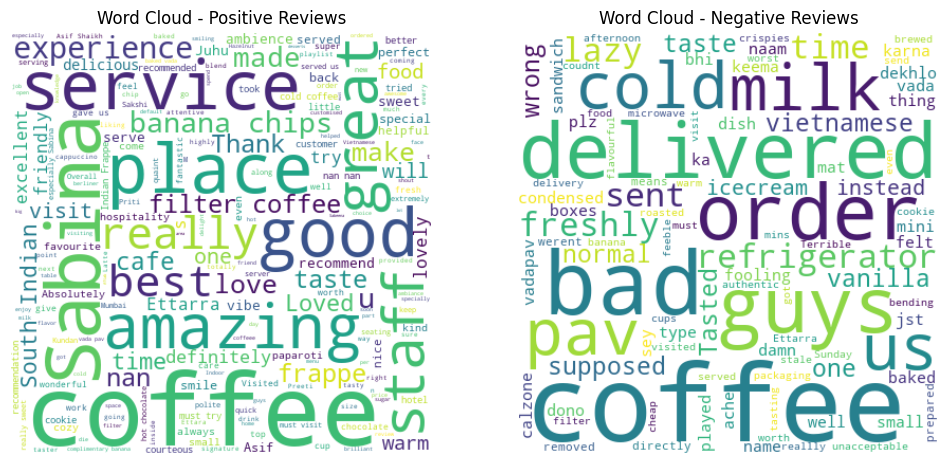

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud

# Load the dataset
df = pd.read_csv('Scraped_dataset.csv') 

# Convert 'Review' column to string to handle potential float values
df['Review'] = df['Review'].astype(str)

# Sentiment Analysis
sid = SentimentIntensityAnalyzer()
df['Sentiment'] = df['Review'].apply(lambda x: 'positive' if sid.polarity_scores(x)['compound'] >= 0 else 'negative')

# Average Rating
average_rating = df['Rating'].mean()
print(f"Average Rating: {average_rating:.2f}")

# Word Cloud for Positive and Negative Reviews
positive_reviews = ' '.join(df[df['Sentiment'] == 'positive']['Review'])
negative_reviews = ' '.join(df[df['Sentiment'] == 'negative']['Review'])

# Plotting Word Clouds
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

wordcloud_positive = WordCloud(width=400, height=400, background_color='white').generate(positive_reviews)
axes[0].imshow(wordcloud_positive, interpolation='bilinear')
axes[0].set_title('Word Cloud - Positive Reviews')
axes[0].axis('off')

wordcloud_negative = WordCloud(width=400, height=400, background_color='white').generate(negative_reviews)
axes[1].imshow(wordcloud_negative, interpolation='bilinear')
axes[1].set_title('Word Cloud - Negative Reviews')
axes[1].axis('off')

plt.show()


Average Rating (Overall): 4.49
Average Rating for Dining: 4.49
Average Rating for Delivery: 4.48


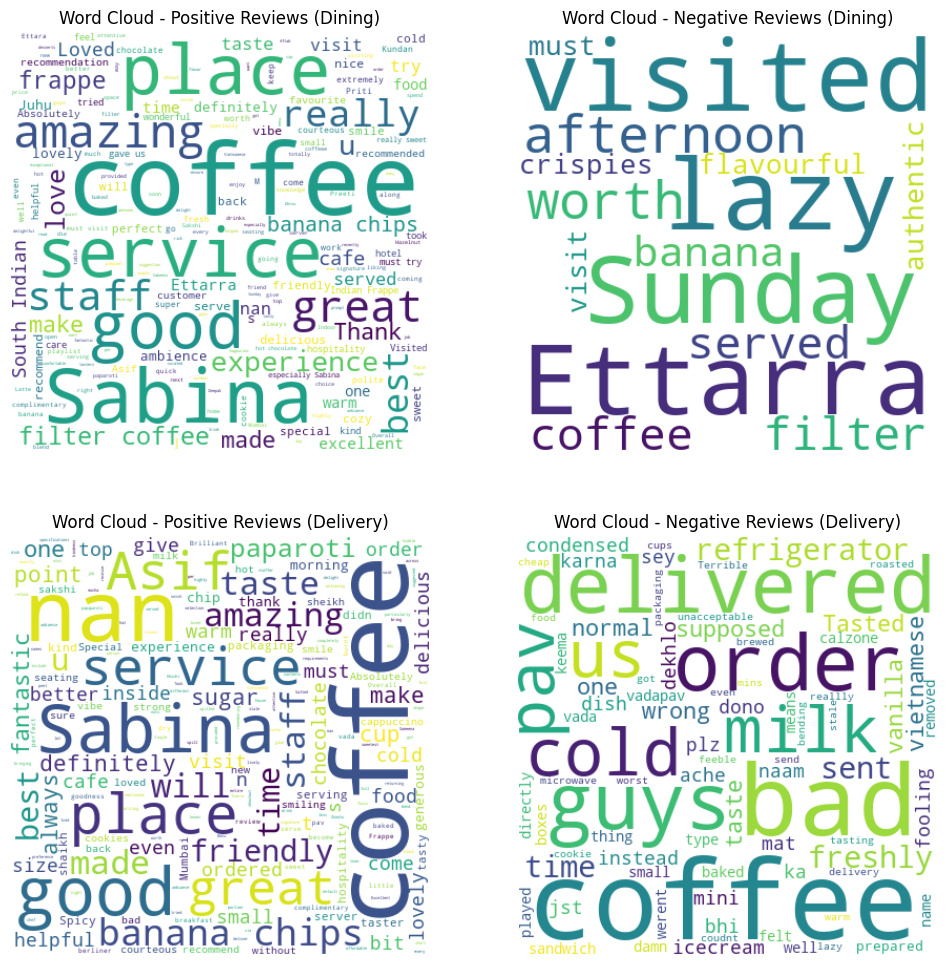

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud

# Load the dataset
df = pd.read_csv('Scraped_dataset.csv')  # Replace 'your_dataset.csv' with the actual file name

# Convert 'Review' column to string to handle potential float values
df['Review'] = df['Review'].astype(str)

# Sentiment Analysis
sid = SentimentIntensityAnalyzer()
df['Sentiment'] = df['Review'].apply(lambda x: 'positive' if sid.polarity_scores(x)['compound'] >= 0 else 'negative')

# Average Rating
average_rating = df['Rating'].mean()
print(f"Average Rating (Overall): {average_rating:.2f}")

# Separate data for Dining and Delivery
df_dining = df[df['Order Type'] == 'DINING']
df_delivery = df[df['Order Type'] == 'DELIVERY']

# Average Rating for Dining
average_rating_dining = df_dining['Rating'].mean()
print(f"Average Rating for Dining: {average_rating_dining:.2f}")

# Average Rating for Delivery
average_rating_delivery = df_delivery['Rating'].mean()
print(f"Average Rating for Delivery: {average_rating_delivery:.2f}")

# Word Cloud for Positive and Negative Reviews in Dining
positive_reviews_dining = ' '.join(df_dining[df_dining['Sentiment'] == 'positive']['Review'])
negative_reviews_dining = ' '.join(df_dining[df_dining['Sentiment'] == 'negative']['Review'])

# Word Cloud for Positive and Negative Reviews in Delivery
positive_reviews_delivery = ' '.join(df_delivery[df_delivery['Sentiment'] == 'positive']['Review'])
negative_reviews_delivery = ' '.join(df_delivery[df_delivery['Sentiment'] == 'negative']['Review'])

# Plotting Word Clouds
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

wordcloud_positive_dining = WordCloud(width=400, height=400, background_color='white').generate(positive_reviews_dining)
axes[0, 0].imshow(wordcloud_positive_dining, interpolation='bilinear')
axes[0, 0].set_title('Word Cloud - Positive Reviews (Dining)')
axes[0, 0].axis('off')

wordcloud_negative_dining = WordCloud(width=400, height=400, background_color='white').generate(negative_reviews_dining)
axes[0, 1].imshow(wordcloud_negative_dining, interpolation='bilinear')
axes[0, 1].set_title('Word Cloud - Negative Reviews (Dining)')
axes[0, 1].axis('off')

wordcloud_positive_delivery = WordCloud(width=400, height=400, background_color='white').generate(positive_reviews_delivery)
axes[1, 0].imshow(wordcloud_positive_delivery, interpolation='bilinear')
axes[1, 0].set_title('Word Cloud - Positive Reviews (Delivery)')
axes[1, 0].axis('off')

wordcloud_negative_delivery = WordCloud(width=400, height=400, background_color='white').generate(negative_reviews_delivery)
axes[1, 1].imshow(wordcloud_negative_delivery, interpolation='bilinear')
axes[1, 1].set_title('Word Cloud - Negative Reviews (Delivery)')
axes[1, 1].axis('off')

plt.show()
